In [3]:
import os
os.getcwd()


'C:\\Users\\akong'

In [19]:
os.getcwd()

'C:\\Users\\akong'

In [34]:
%cd 'c:/users/akong/fin-data-analyst'

[WinError 123] The filename, directory name, or volume label syntax is incorrect: "'c:/users/akong/fin-data-analyst'"
C:\Users\akong


In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols 
from scipy.stats import norm



In [134]:
import sklearn 

from sklearn.linear_model import LinearRegression

In [136]:
data_root=   "https://github.com/ageron/data/raw/main/"
lifesat= pd.read_csv(data_root + "lifesat/lifesat.csv")
lifesat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


In [137]:
x= lifesat[['GDP per capita (USD)']].values
x
y= lifesat[['Life satisfaction']]

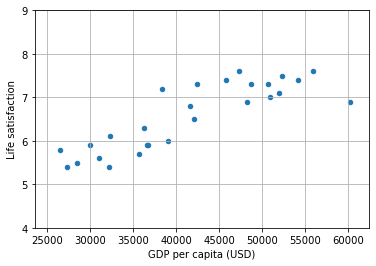

In [138]:
lifesat.plot(kind='scatter',grid=True, x= 'GDP per capita (USD)',
             y =  'Life satisfaction')
plt.axis([23_500, 62_500, 4,9])
plt.show()



In [6]:
mmp= {'country': ['Turkey', 'Hungary','France','United States', 'New Zealand', 'Australia','Denmark'],'GDP': [28384, 31008, 42026, 60236, 42404,48698, 5593], 'life':[5.5,5.6,6.5,6.9,7.3,7.3,7.6]}
mmp
money= pd.DataFrame(mmp)
money

,country,GDP,life
0,Turkey,28384,5.5
1,Hungary,31008,5.6
2,France,42026,6.5
3,United States,60236,6.9
4,New Zealand,42404,7.3
5,Australia,48698,7.3
6,Denmark,5593,7.6


In [7]:
# training on data cleaning
  # mean life expectancy for all nations
money['GDP'].mean()

36907.0

In [14]:
# insert a new column call long that remove the decimals from life expectancy

money['long']= money['country'].str.strip('')
money

,country,GDP,life,long
0,Turkey,28384,5.5,Turkey
1,Hungary,31008,5.6,Hungary
2,France,42026,6.5,France
3,United States,60236,6.9,United States
4,New Zealand,42404,7.3,New Zealand
5,Australia,48698,7.3,Australia
6,Denmark,5593,7.6,Denmark


In [18]:
assert money['life'].dtype=='int'

AssertionError: 

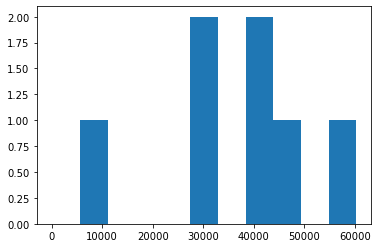

In [8]:
plt.hist(money['GDP'])
plt.hist(money['life'])
plt.show()

In [9]:
money

,country,GDP,life
0,Turkey,28384,5.5
1,Hungary,31008,5.6
2,France,42026,6.5
3,United States,60236,6.9
4,New Zealand,42404,7.3
5,Australia,48698,7.3
6,Denmark,5593,7.6


In [17]:
lifesat
life_sat=lifesat.rename(columns={'GDP per capita (USD)':'GDP', 'Life satisfaction':'life'})

In [18]:
# the first training is on data sampline.
# perform some sampling technics on the life state data.
lifsat_pop= life_sat[['GDP', 'life']]

In [22]:
lifsat_pop.head()

,GDP,life
0,26456.387938,5.8
1,27287.083401,5.4
2,28384.987785,5.5
3,29932.493910,5.9
4,31007.768407,5.6


In [20]:
# samplelifsat
lifesat_sample= lifsat_pop.sample(n=10)
lifesat_sample

,GDP,life
14,42025.617373,6.5
2,28384.987785,5.5
25,55938.212809,7.6
10,36732.034744,5.9
6,32238.157259,6.1
7,35638.421351,5.7
0,26456.387938,5.8
26,60235.728492,6.9
13,41627.129269,6.8
16,45856.625626,7.4


In [25]:
# check population paramater
#mean using numpy
import numpy as np
np.mean(lifsat_pop['life'])

6.566666666666666

In [91]:
lifsat_pop['life'].mean()


6.566666666666666

<AxesSubplot:>

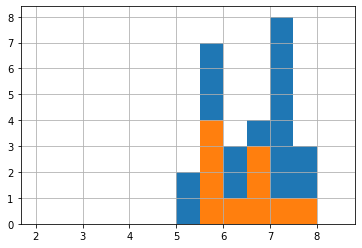

In [34]:
#  visualise GDP
# Both pop data and sample data
lifsat_pop['life'].hist(bins=np.arange(2,9,0.5))
lifesat_sample['life'].hist(bins=np.arange(2,9,0.5))

(array([  0.,   0.,   2.,  10.,  31., 109., 271., 521., 711., 858., 882.,
        663., 523., 269., 107.,  34.,   9.,   0.,   0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 <BarContainer object of 19 artists>)

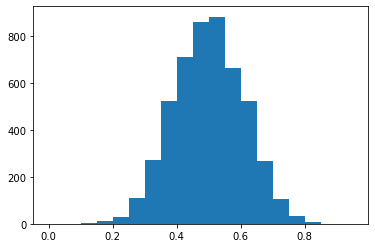

In [40]:
# visualised a random number sample to understand random numbers
random = np.random.beta(a=10, b=10, size=5000)
random
plt.hist(random, bins=np.arange(0,1,.05))

In [42]:
#understand random sampling

life_sat.sample(n=5, random_state=19000113)

,Country,GDP,life
3,Latvia,29932.493910,5.9
16,Canada,45856.625626,7.4
19,Australia,48697.837028,7.3
8,Spain,36215.447591,6.3
2,Turkey,28384.987785,5.5


In [45]:
# understanding systematic sample
Sample_size= 5
pop_size= len(life_sat)
pop_size

27

In [48]:
interval = pop_size//Sample_size
interval

5

In [51]:
# systematic samplin  and rol selection
life_system= life_sat.iloc[::interval]
life_system

,Country,GDP,life
0,Russia,26456.387938,5.8
5,Portugal,32181.154537,5.4
10,Lithuania,36732.034744,5.9
15,New Zealand,42404.393738,7.3
20,Sweden,50683.323510,7.3
25,Denmark,55938.212809,7.6


NameError: name 'ply' is not defined

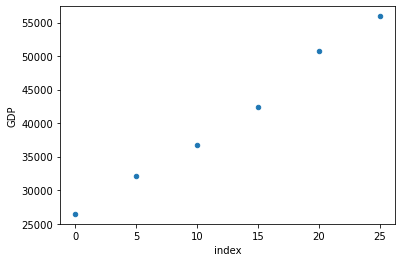

In [60]:
# ploting systematic sampling
life_system_id= life_system.reset_index()
life_system_id
life_system_id.plot(x="index", y='GDP', kind="scatter")
ply.show()

In [61]:
life_system_id

,index,Country,GDP,life
0,0,Russia,26456.387938,5.8
1,5,Portugal,32181.154537,5.4
2,10,Lithuania,36732.034744,5.9
3,15,New Zealand,42404.393738,7.3
4,20,Sweden,50683.323510,7.3
5,25,Denmark,55938.212809,7.6


In [63]:
shuffled= life_sat.sample(frac=1)
shuffled= shuffled.reset_index(drop= True).reset_index()
shuffled

,index,Country,GDP,life
0,0,Canada,45856.625626,7.4
1,1,Slovenia,36547.738956,5.9
2,2,Estonia,35638.421351,5.7
3,3,Spain,36215.447591,6.3
4,4,Israel,38341.307570,7.2
5,5,Belgium,48210.033111,6.9
6,6,Italy,38992.148381,6.0
7,7,Greece,27287.083401,5.4
8,8,Hungary,31007.768407,5.6
9,9,Poland,32238.157259,6.1


<AxesSubplot:xlabel='index', ylabel='GDP'>

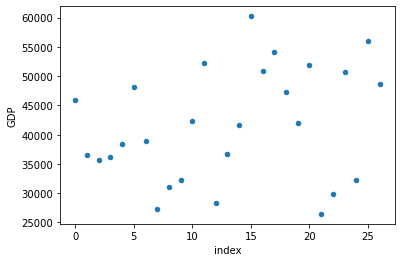

In [65]:
shuffled.plot(x="index", y= 'GDP', kind= "scatter")

In [79]:
# calculating relative error
# 100*(pop_mean-sample_mean)/pop_mean

life_sat_mean= life_sat['GDP'].mean()
life_sat_mean
life_sat_sample_mean= life_sat.sample(n=10, )['GDP'].mean()
life_sat_sample_mean
reletive_error= 100*abs(life_sat_mean-life_sat_sample_mean)/life_sat_mean
reletive_error

5.862894200626658

In [81]:
# sample sizes
sample_sizes= len( life_sat.sample(n=10, ))
sample_sizes

10

In [111]:
# get the error of the standard distribution and means

mean_cup_points_1000=[]
for i in range (1000):
    mean_cup_points_1000.append(
       np.mean(life_sat.sample(frac=1,replace=True)['GDP'])
    )
boodstrap_distn=mean_cup_points_1000

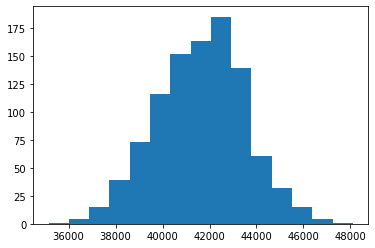

In [114]:
plt.hist(boodstrap_distn, bins=15)
plt.show()


In [98]:
# the standard error of 
std_erre= np.std(boodstrap_distn, ddof=1)

NameError: name 'boodstrap_distn' is not defined

In [127]:
# mean of life_sat
mean = life_sat['GDP'].mean()
mean

41564.521771015454

In [131]:
# gdp greater than 5000 shows a better performing economics
GDP_5000= 5000
Z= (5000-mean)/std_erre
Z

-19.461721035916252

In [142]:
Data_sale= pd.read_csv( r"C:\Users\akong\OneDrive\Desktop\doc assemble\data camp files\pet_sales (1).csv"          )

In [143]:
Data_sale


,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0
...,...,...,...,...,...,...,...,...,...
874,4999,Snack,"$27,000",146.93,VC_1564,medium,bird,6,0
875,4243,Snack,"$76,000",174.07,VC_808,medium,hamster,8,0
876,4783,Snack,"$162,000",224.12,VC_1348,medium,cat,7,1
877,4664,Bedding,"$34,000",199.15,VC_1229,large,dog,10,1


In [144]:
Data_sale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


In [145]:
Data_sale['sale1']= Data_sale['sales'].str.strip('$').str.replace(',', '').astype('float')


In [146]:
Data_sale.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy,sale1
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1,123000.0
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0,61000.0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0,218000.0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1,69000.0
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0,138000.0


In [151]:
# test the hypothesy that for a give amount of sales the mean is 100000
mean_sales= Data_sale['sale1'].mean()
mean_sales

116094.42548350398

In [156]:
# determine the error terms to be use in the t test. 
erro_dist= []
for i in range(5000):
    erro_dist.append(np.mean(
        Data_sale.sample(frac=1, replace= True)['sale1']
    )
                    )

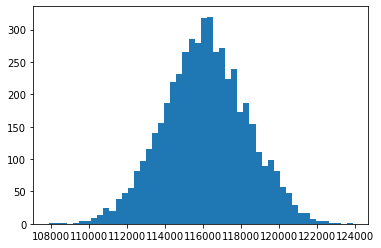

In [157]:
# visualise the distribution
plt.hist(erro_dist, bins=50)
plt.show()

In [160]:
# get the standard deviation of the erro term
standart= np.std(erro_dist, ddof=1)
standart

2201.8049287363497

In [167]:
Z_score= (mean_sales-100000)/standart
Z_score

7.309650947480083

In [168]:
from scipy.stats import norm
1-norm.cdf(Z_score, loc=0,scale=1)

1.3389289676979388e-13

In [188]:
# are smaller pets having beteer sales that larher pets

m=Data_sale.groupby("pet_size")['sale1'].mean()

In [189]:
s=Data_sale.groupby('pet_size')['sale1'].std()

In [192]:
s

pet_size
extra_large    69433.273184
extra_small    61803.371059
large          68805.940515
medium         66727.761902
small          65631.285450
Name: sale1, dtype: float64

In [196]:
# Anova test of difference ingroups
value_c= Data_sale['pet_type'].value_counts()
value_c


pet_type
cat        347
dog        347
fish        70
bird        69
hamster     23
rabbit      23
Name: count, dtype: int64

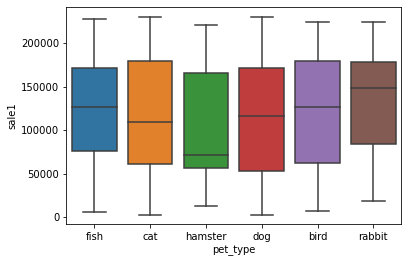

In [198]:
sns.boxplot(x='pet_type',
          y='sale1',
          data= Data_sale)
plt.show()

In [204]:
# analysi of variance
import pingouin
pingouin.anova(data=Data_sale,
              dv='sale1',
              between='pet_size')

,Source,ddof1,ddof2,F,p-unc,np2
0,pet_size,4,874,0.373154,0.827872,0.001705


In [95]:
from sklearn.neighbors import KNeighborsClassifier

x= Data_sale[['sale1', 'rating']].values
y= Data_sale['re_buy'].values

print(x.shape, y.shape)

(879, 2) (879,)


In [94]:
knn= KNeighborsClassifier(n_neighbors=15)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=15)

In [93]:
# new data to predict
x_new=np.array([[50000, 5],[70000,9],[100000,8]])
print(x_new)

[[ 50000      5]
 [ 70000      9]
 [100000      8]]


In [92]:
# predict the  kk means
predictions= knn.predict(X_new)
print('Predictions: {}'. format(predictions))

Predictions: [1 0 0]


In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.5643939393939394


In [109]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    train_accuracies[neighbor] = knn.score(x_train, y_train)
    test_accuracies[neighbor] = knn.score(x_test, y_test)


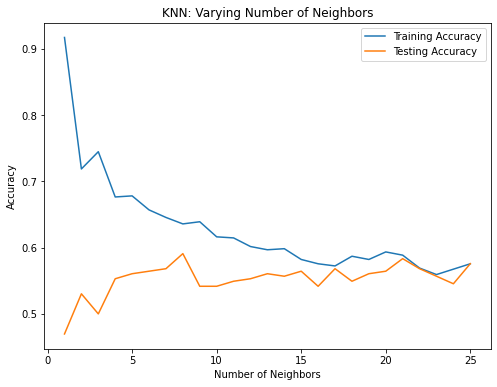

In [110]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [117]:
# regression studies
reg= Data_sale
bx= reg.drop('re_buy', axis=1).values
by=reg['re_buy'].values


In [119]:
print(type(bx), type(by))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


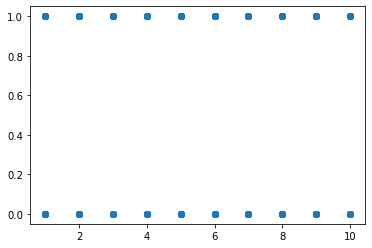

In [127]:
# predict a single feature of regrati
rating= bx[:,7]
rating= rating.reshape(-1,1)
plt.scatter(rating, by)
plt.show()

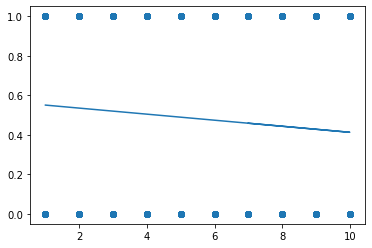

In [134]:
from sklearn.linear_model import LinearRegression
regg= LinearRegression()
regg.fit(rating, by)
predictions=regg.predict(rating)
plt.scatter(rating,by)
plt.plot(rating, predictions)


In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=21, stratify=y)
regg= LinearRegression()
regg.fit(x_train, y_train)
y_predict= regg.predict(x_test)
regg.score(x_test, y_test)


0.005355711539129948

In [143]:
Iris_a= pd.read_csv(r"C:\Users\akong\OneDrive\Documents\pythone learning\dataset\iris.csv" )

In [158]:
Iris_a


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [165]:
iris= Iris_a[[ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [210]:
Samples= iris.isnull().sum()
Samples

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [197]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)

KMeans(n_clusters=3)

In [1]:
labels = model.predict(samples)
print(labels)

NameError: name 'model' is not defined

In [200]:
# scatter plot
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels)
plt.show()

NameError: name 'labels' is not defined